## R SWAT Modelagem

Github do SWAT: https://github.com/sassoftware/R-swat

Action sets: https://go.documentation.sas.com/?docsetId=allprodsactions&docsetTarget=actionSetsByName.htm&docsetVersion=3.5&locale=en

Documentação: https://developer.sas.com/apis/swat/r/v1.3.0/R-swat.pdf

In [ ]:
#install.packages('https://github.com/sassoftware/R-swat/releases/download/v1.5.0/R-swat-1.5.0-linux64.tar.gz',
#                   repos=NULL, type='file')
#install.packages('https://github.com/sassoftware/R-swat/releases/download/v1.5.0/R-swat-1.5.0-win64.tar.gz',
#                   repos=NULL, type='file')


In [1]:
# Load necessary packages
library('swat')
library('ggplot2')
library('reshape2')
#options(cas.print.messages = FALSE)

SWAT 1.5.0

Warning message:
"package 'ggplot2' was built under R version 4.0.2"


In [2]:
conn <- CAS('pdcesx14134.exnet.sas.com', 
            port=8777, protocol = "http",
            caslib = 'casuser', 
            username = 'username', password = 'password')

NOTE: Connecting to CAS and generating CAS action functions for loaded

      action sets...

NOTE: To generate the functions with signatures (for tab completion), set 

      options(cas.gen.function.sig=TRUE).



In [4]:
cas.table.tableInfo(conn, caslib = 'public')

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,...,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,...,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,HMEQ,5960,13,0,utf-8,2020-07-03T09:13:01-04:00,2020-07-03T09:13:01-04:00,2020-07-03T09:16:01-04:00,UTF8,1909401181,...,0,0,0,HMEQ.sashdat,Public,0,sasdemo,,2019-11-19T12:22:14-04:00,1889799734
2,HMEQ_DUMMIES,5960,21,0,utf-8,2020-07-03T09:57:53-04:00,2020-07-03T09:57:53-04:00,2020-07-03T09:57:53-04:00,UTF8,1909403873,...,0,0,0,HMEQ_DUMMIES.csv,Public,0,sasdemo,,2020-07-01T23:19:05-04:00,1909279145


In [5]:
cas.table.caslibInfo(conn)

,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CASUSER(sasdemo),PATH,Personal File System Caslib,/home/sasdemo/casuser/,,1,0,1,1,0,1
2,Formats,PATH,Stores user defined formats.,/opt/sas/viya/config/data/cas/default/formats/,,0,0,0,0,0,0
3,ModelPerformanceData,PATH,Library for Model Management performance objects.,/opt/sas/viya/config/data/cas/default/modelMonitorLibrary/,,0,0,0,0,0,0
4,Models,PATH,Stores models created by Visual Analytics for use in other analytics or SAS Studio.,/opt/sas/viya/config/data/cas/default/models/,,0,0,0,0,0,0
5,Public,PATH,"Shared and writeable caslib, accessible to all users.",/opt/sas/viya/config/data/cas/default/public/,,0,0,0,0,0,0
6,QASMartStore,PATH,Stores quality analytic suite mart tables.,/opt/sas/viya/config/data/cas/default/qasMartStore/,,0,0,0,0,0,0
7,Samples,PATH,"Stores sample data, supplied by SAS.",/opt/sas/viya/config/data/cas/default/samples/,,0,0,0,0,0,0
8,SystemData,PATH,"Stores application generated data, used for general reporting.",/opt/sas/viya/config/data/cas/default/sysData/,,0,0,0,0,0,0


In [6]:
## Carregando Actionsets no CAS
actionsets <- c('sampling', 'decisionTree', 'neuralNet', 'percentile')
for(i in actionsets){
    loadActionSet(conn, i)
}

NOTE: Added action set 'sampling'.

NOTE: Information for action set 'sampling':

NOTE:    sampling

NOTE:       srs -  Samples a proportion of data from the input table or partitions the data into no more than three portions

NOTE:       stratified - Samples a proportion of data or partitions the data into no more than three portions within each stratum

NOTE:       oversample - Samples a user-specified proportion of data from the event level and adjusts the ratio between rare events and non-rare events to a user-specified ratio

NOTE:       kfold - K-fold partitioning.

NOTE: Added action set 'decisionTree'.

NOTE: Information for action set 'decisionTree':

NOTE:    decisionTree

NOTE:       dtreeTrain - Trains a decision tree

NOTE:       dtreeScore - Scores a table using a decision tree model

NOTE:       dtreeSplit - Splits decision tree nodes

NOTE:       dtreePrune - Prune a decision tree

NOTE:       dtreeMerge - Merges decision tree nodes

NOTE:       dtreeCode - Generates DA

In [7]:
# Carregando dados para CAS
castbl <- cas.read.csv(conn, './data/hmeq.csv')

NOTE: Cloud Analytic Services made the uploaded file available as table HMEQ in caslib CASUSER(sasdemo).



In [8]:
cas.table.tableInfo(conn)

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,...,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,...,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,HMEQ,5960,13,0,utf-8,2020-07-03T10:18:19-04:00,2020-07-03T10:18:19-04:00,2020-07-03T10:18:19-04:00,UTF8,1909405099,...,0,0,0,,,0,sasdemo,,2020-07-03T10:18:19-04:00,1909405099


In [9]:
class(castbl)

[1] "CASTable"
attr(,"package")
[1] "swat"

In [10]:
head(castbl)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1100,25860,39025,HomeImp,Other,10.5,0,0,94.36667,1,9,NaN
2,1,1300,70053,68400,HomeImp,Other,7.0,0,2,121.83333,0,14,NaN
3,1,1500,13500,16700,HomeImp,Other,4.0,0,0,149.46667,1,10,NaN
4,1,1500,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,1700,97800,112000,HomeImp,Office,3.0,0,0,93.33333,0,14,NaN
6,1,1700,30548,40320,HomeImp,Other,9.0,0,0,101.46600,1,8,37.11361


In [15]:
summary(castbl)

ERROR: Error: `x` must be a vector, not a `casDataFrame` object.


In [17]:
table <- cas.simple.summary(castbl)

In [21]:
table$Summary[c(1:3),c('Min', 'Max')]

,Min,Max
,<dbl>,<dbl>
1,0,1
2,1100,89900
3,2063,399550


In [22]:
# Trazer dados para maquina local
df <- to.casDataFrame(castbl, obs = nrow(castbl))

In [23]:
head(df)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1100,25860,39025,HomeImp,Other,10.5,0,0,94.36667,1,9,NaN
2,1,1300,70053,68400,HomeImp,Other,7.0,0,2,121.83333,0,14,NaN
3,1,1500,13500,16700,HomeImp,Other,4.0,0,0,149.46667,1,10,NaN
4,1,1500,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,1700,97800,112000,HomeImp,Office,3.0,0,0,93.33333,0,14,NaN
6,1,1700,30548,40320,HomeImp,Other,9.0,0,0,101.46600,1,8,37.11361


In [24]:
# Formatacao de dados
d <- melt(df[sapply(df, is.numeric)], id.vars=NULL)
head(d)

,variable,value
,<fct>,<dbl>
1,BAD,1
2,BAD,1
3,BAD,1
4,BAD,1
5,BAD,0
6,BAD,1


In [25]:
tail(d)

,variable,value
,<fct>,<dbl>
65555,DEBTINC,NaN
65556,DEBTINC,36.08804
65557,DEBTINC,36.75365
65558,DEBTINC,36.26269
65559,DEBTINC,34.75116
65560,DEBTINC,34.24246


Warning message:
"Removed 4740 rows containing non-finite values (stat_bin)."


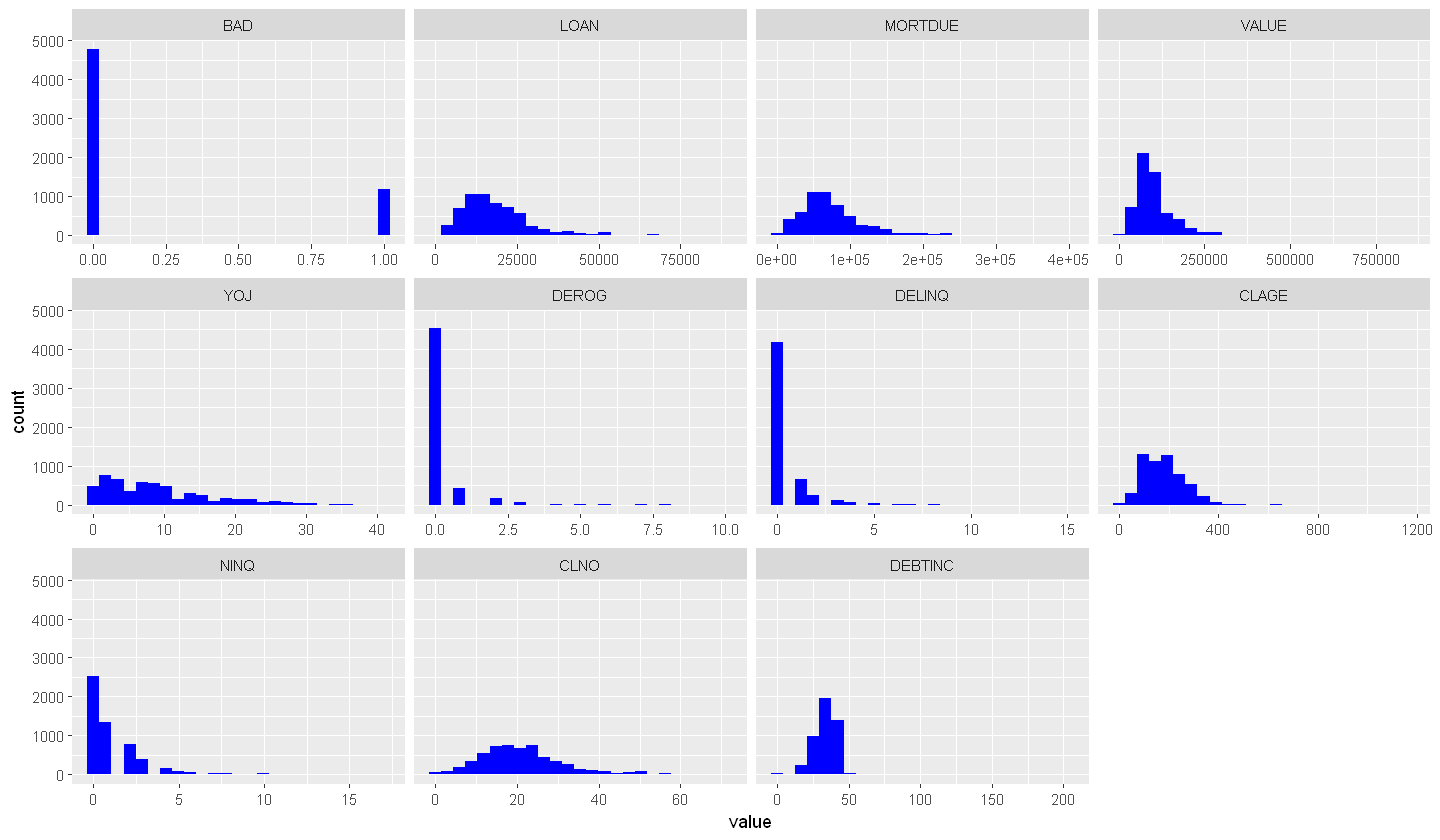

In [27]:
options(repr.plot.width=12, repr.plot.height=7)

ggplot(d, aes(x = value)) +
    geom_histogram(fill = 'blue', bins = 25) +
    facet_wrap(~variable,
               scales = 'free_x') 

In [32]:
cas.table.promote(conn, name = 'hmeq')

NOTE: Cloud Analytic Services promoted table HMEQ in caslib CASUSER(sasdemo) to table hmeq in caslib CASUSER(sasdemo).



list()

In [29]:
# Ver dados faltantes de todas variaveis
tbl <- cas.simple.distinct(castbl)
tbl$Distinct

,Column,NDistinct,NMiss,Trunc
,<chr>,<dbl>,<dbl>,<dbl>
1,BAD,2,0,0
2,LOAN,540,0,0
3,MORTDUE,5054,518,0
4,VALUE,5382,112,0
5,REASON,3,252,0
6,JOB,7,279,0
7,YOJ,100,515,0
8,DEROG,12,708,0
9,DELINQ,15,580,0


In [ ]:
# Pegando dados missing
cas.nmiss(castbl)

In [ ]:
# Visualizacao de missing
tbl$PctMiss <- tbl$NMiss/nrow(castbl)

In [ ]:
ggplot(tbl, aes(Column, PctMiss)) +
    geom_col(fill = 'blue') +
    ggtitle('Pct Missing Values') +
    theme(plot.title = element_text(hjust = 0.5))

In [ ]:
# Imputacao de dados missing
cas.dataPreprocess.impute(castbl,
    methodContinuous = 'MEDIAN',
    methodNominal = 'MODE',
    inputs = colnames(castbl)[-1],
    copyAllVars = TRUE,
    casOut = list(name = 'hmeq', 
                replace = TRUE)
)

In [ ]:
# Particionamento de dados
cas.sampling.srs(conn,
    table = 'hmeq',
    samppct = 30,
    partind = TRUE,
    output = list(casOut = list(name = 'hmeq', replace = T), 
                  copyVars = 'ALL')
)

In [ ]:
hmeq1 <- defCasTable(conn, 'hmeq')

In [ ]:
head(hmeq1)

In [ ]:
indata <- 'hmeq'

# Pega infromacao das variaveis
colinfo <- head(cas.table.columnInfo(conn, table = indata)$ColumnInfo, -1)

In [ ]:
# Variavel target
target <- colinfo$Column[1]


In [ ]:
# Separacao para modelos que lidam com missing
inputs <- colinfo$Column[-1]
nominals <- c(target, subset(colinfo, Type == 'varchar')$Column)

In [ ]:
# Separacao para modelos que nao lidam com missing
imp.inputs <- grep('IMP_', inputs, value = T)
imp.nominals <- c(target, grep('IMP_', nominals, value = T))

In [ ]:
# Treina modelos
## Arvore de decisão
cas.decisionTree.dtreeTrain(conn,
    table = list(name = indata, where = '_PartInd_ = 0'),
    target = target,
    inputs = inputs,
    nominals = nominals,
    varImp = TRUE,
    casOut = list(name = 'dt_model', replace = TRUE)
)

In [ ]:
## Random Forest
cas.decisionTree.forestTrain(conn,
    table = list(name = indata, where = '_PartInd_ = 0'),
    target = target,
    inputs = inputs,
    nominals = nominals,
    casOut = list(name = 'rf_model', replace = TRUE)
)

In [ ]:
## Gradient Boosting
cas.decisionTree.gbtreeTrain(conn,
    table = list(name = indata, where = '_PartInd_ = 0'),
    target = target,
    inputs = inputs,
    nominals = nominals,
    casOut = list(name = 'gbt_model', replace = TRUE)
)

In [ ]:
## Neural Network
cas.neuralNet.annTrain(conn,
    table = list(name = indata, where = '_PartInd_ = 0'),
    target = target,
    inputs = imp.inputs,
    hidden = 7,
    nominals = imp.nominals,
    casOut = list(name = 'nn_model', replace = TRUE)
)

In [ ]:
### Prevendo um unico modelo
cas.decisionTree.dtreeScore(
    object       = hmeq1,
    modelTable   = list(name = 'dt_model'),
    copyVars     = list(target, '_PartInd_'),
    assessonerow = TRUE,
    casOut       = list(name = 'dt_scored', replace = T)
)

In [ ]:
dt_scores <- defCasTable(conn, 'dt_scored')

In [ ]:
head(dt_scores)

In [ ]:
models <- c('dt','rf','gbt','nn')
scores <- c(cas.decisionTree.dtreeScore, cas.decisionTree.forestScore, 
            cas.decisionTree.gbtreeScore, cas.neuralNet.annScore)
names(scores) <- models

In [ ]:
# Funcao para atumatizar processo de predicao em novos dados
score.params <- function(model){return(list(
    object       = defCasTable(conn, indata),
    modelTable   = list(name = paste0(model, '_model')),
    copyVars     = list(target, '_PartInd_'),
    assessonerow = TRUE,
    casOut       = list(name = paste0(model, '_scored'), replace = T)
))}

In [ ]:
lapply(models, 
       function(x) {do.call(scores[[x]], 
                            score.params(x))}
      )

In [ ]:
# Carrega actionset para a
# loadActionSet(conn, 'percentile')

In [ ]:
## assesment de um único modelo
asses <-  cas.percentile.assess(conn,
        table    = list(name = paste0('dt_scored'), 
                        where = '_PartInd_ = 1'),
        inputs   = paste0('_dt_P_           1'),
        response = target,
        event    = '1')

In [ ]:
head(asses$LIFTInfo)

In [ ]:
head(asses$ROCInfo)

In [ ]:
# Funcao para comparacao de modelos
assess.model <- function(model){
    cas.percentile.assess(conn,
        table    = list(name = paste0(model,'_scored'), 
                        where = '_PartInd_ = 1'),
        inputs   = paste0('_', model, '_P_           1'),
        response = target,
        event    = '1')
}

In [ ]:
model.names <- c('Decision Tree', 'Random Forest', 
                 'Gradient Boosting', 'Neural Network')
roc.df <- data.frame()

for (i in 1:length(models)){
    tmp <- (assess.model(models[i]))$ROCInfo
    tmp$Model <- model.names[i] 
    roc.df <- rbind(roc.df, tmp)
}

In [ ]:
# Manipulacao do DF
compare <- subset(roc.df, round(roc.df$CutOff, 2) == 0.5)
rownames(compare) <- NULL
compare[,c('Model','TP','FP','FN','TN')]

In [ ]:
# Cria dataframe pra comparar missclassification
compare$Misclassification <- 1 - compare$ACC
miss <- compare[order(compare$Misclassification), c('Model','Misclassification')]
rownames(miss) <- NULL
miss

In [ ]:
# Add nova coluna pra ser usada com label da curva Roc
roc.df$Models <- paste(roc.df$Model, round(roc.df$C, 3), sep = ' - ')

In [ ]:
# Cria curva ROC
options(repr.plot.width=14, repr.plot.height=6)

plot <- ggplot(data = roc.df[c('FPR', 'Sensitivity', 'Models')],
    aes(x = FPR, y = Sensitivity, colour = Models)) +
    geom_line(size =1.2) +
    labs(x = 'False Positive Rate', y = 'True Positive Rate')
plot

In [ ]:
plotly::embed_notebook(plotly::ggplotly(plot))

In [ ]:
# Fim sessao
cas.session.endSession(conn)